In [1]:
library(data.table)
library(ggplot2)
library(ggsci)
library(viridis)
library(devtools)
library(readr)
library(plyr)

Loading required package: viridisLite

Loading required package: usethis



In [30]:
options(repr.plot.width=10, repr.plot.height=8)

In [2]:
source('~/g/src/R/Imports.R')

In [19]:
setwd('~/g/balsam/test/ddocent')

# Make Pop_ID file
    also add ploidy

In [20]:
indv<-read.table("filtering/good_snps.recode.vcf.012.indv",sep="\t")

In [21]:
unlist(strsplit(as.character(indv$V1[1]),"/"))

[1] "BS_KM_10"

In [22]:
indv$V1[1]

[1] BS_KM_10
45 Levels: BS_KM_10 BS_KM_11 BS_KM_2 BS_KM_4 BS_KM_6 BS_KM_7 ... PI_ZZ_8102

In [32]:
Sp <- rep(NA,times=nrow(indv))
Pop <- rep(NA,times=nrow(indv))
ID <- rep(NA,times=nrow(indv))
for (i in 1:nrow(indv)){
  Sp[i] <- unlist(strsplit(as.character(indv$V1[i]),"_"))[1]
  Pop[i] <- unlist(strsplit(as.character(indv$V1[i]),"_"))[2]
  ID[i] <- unlist(strsplit(as.character(indv$V1[i]),"_"))[3] 
}
Pop_ID <- data.frame(Sp=Sp,Pop=Pop,ID=ID,All=indv$V1)
head(Pop_ID)

,Sp,Pop,ID,All
,<fct>,<fct>,<fct>,<fct>
1,BS,KM,10,BS_KM_10
2,BS,KM,11,BS_KM_11
3,BS,KM,2,BS_KM_2
4,BS,KM,4,BS_KM_4
5,BS,KM,6,BS_KM_6
6,BS,KM,7,BS_KM_7


In [24]:
write.csv(Pop_ID,"Pop_ID.csv",row.names = FALSE)

# Make PCA

In [25]:
df012<-fread("filtering/good_snps.recode.vcf.012",sep="\t", data.table=F) 
df012 <- df012[,-1]

Pop_ID <- read.csv('Pop_ID.csv')

    PC1     PC2     PC3     PC4     PC5 
0.12071 0.05389 0.04571 0.04289 0.03622 


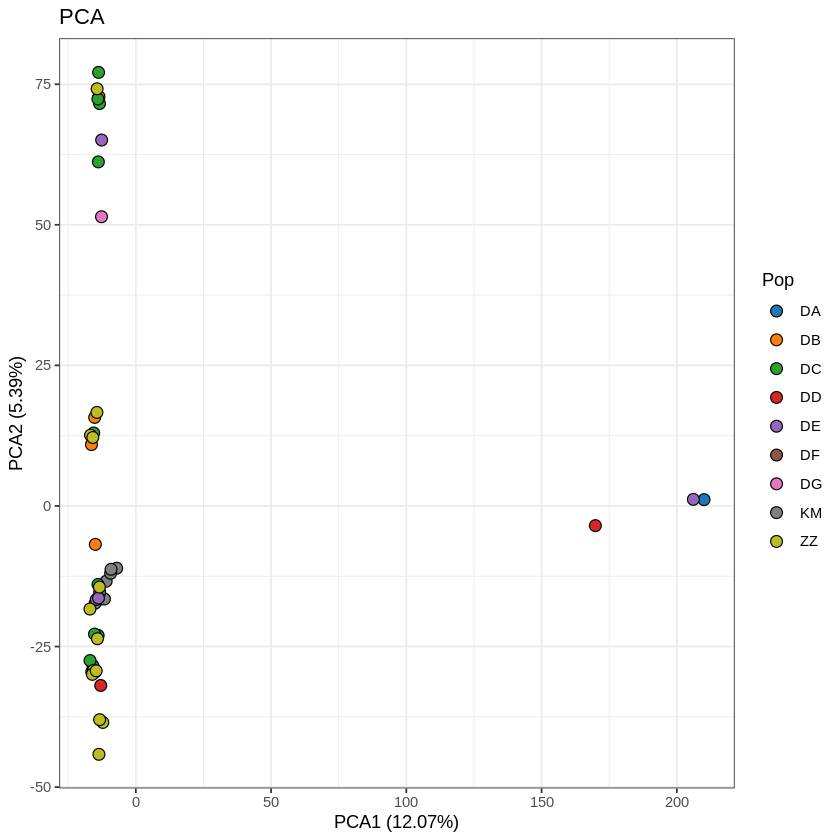

In [26]:
pca_out <- PCA_gen(df012,Pop_ID)
pve <- pca_out$pve[1:5]

In [27]:
pca_df <- pca_out$pca_df

In [33]:
pca_df$Sp <- Pop_ID$Sp

# Plot by Population

In [34]:
pve <- c(0.12071, 0.05389)

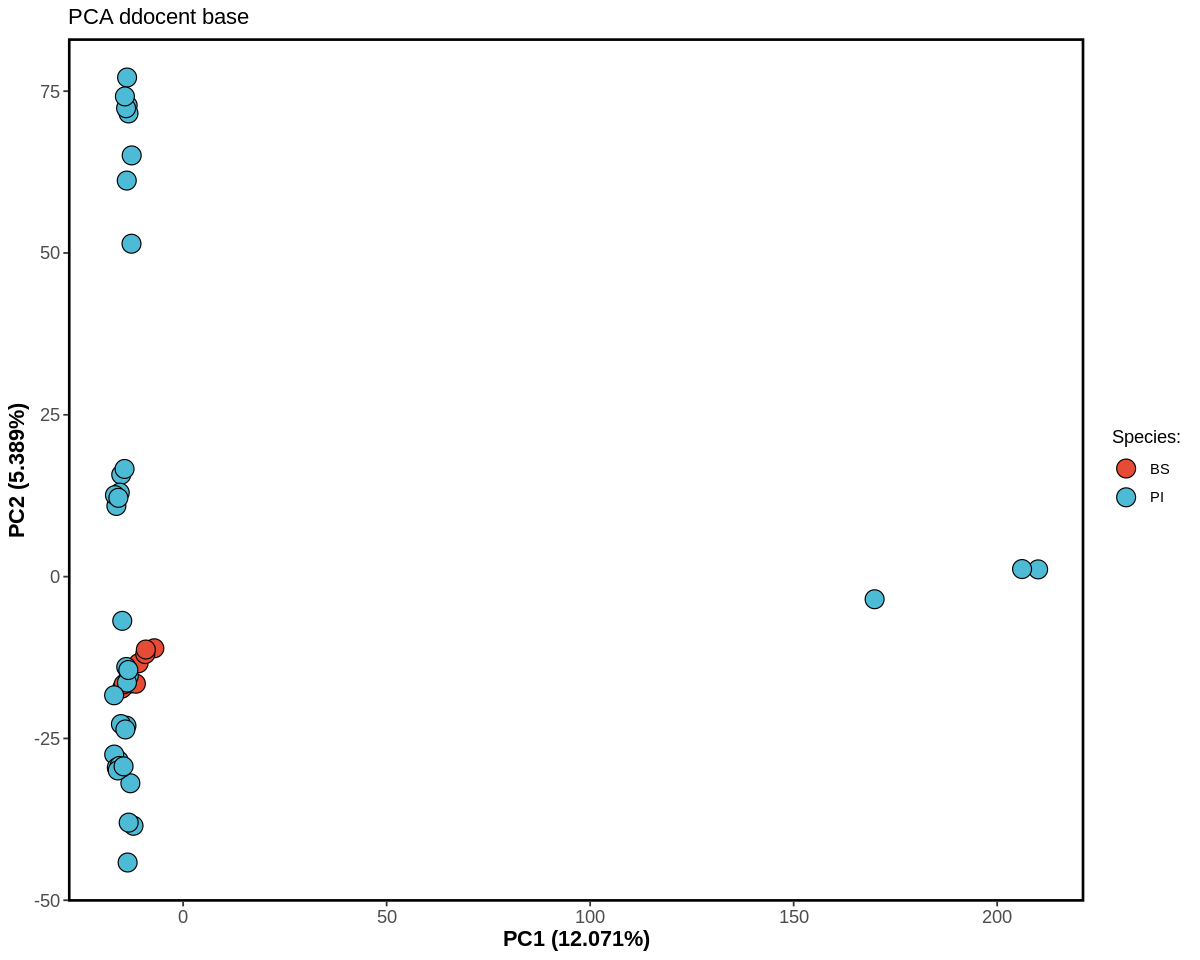

In [37]:
ggplot(data = pca_df, aes(x=PC1,y=PC2,fill=as.character(Sp))) + 
  geom_point(pch=21,colour='black',size = 5)+ ggtitle("PCA ddocent base") +
  xlab(paste("PC",1," (",pve[1]*100,"%)",sep="")) + ylab(paste("PC",2," (",pve[2]*100,"%)",sep=""))  +
  scale_fill_npg(name='Species:') + 
  #scale_fill_d3(name='Pop',palette = 'category20') + 
  theme_bw() + 
  theme(#legend.position = 'none',
    axis.text = element_text(size=11), 
    axis.title = element_text(size = 13, colour="black",face = "bold",vjust = 1),
    panel.border = element_rect(size = 1.5, colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank())

In [18]:
count(Pop_ID,vars='Pop')

Pop,freq
<fct>,<int>
CN,10
GB,10
KM,8
QG,12
